In [1]:
import pandas as pd

In [2]:
df2 = pd.read_csv('dataset2.csv')
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17741640 entries, 0 to 17741639
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   timestamp        object 
 1   cpu_temperature  float64
 2   cpu_usage        float64
 3   cpu_load         float64
 4   memory_usage     float64
 5   cpu_power        float64
dtypes: float64(5), object(1)
memory usage: 812.1+ MB
None


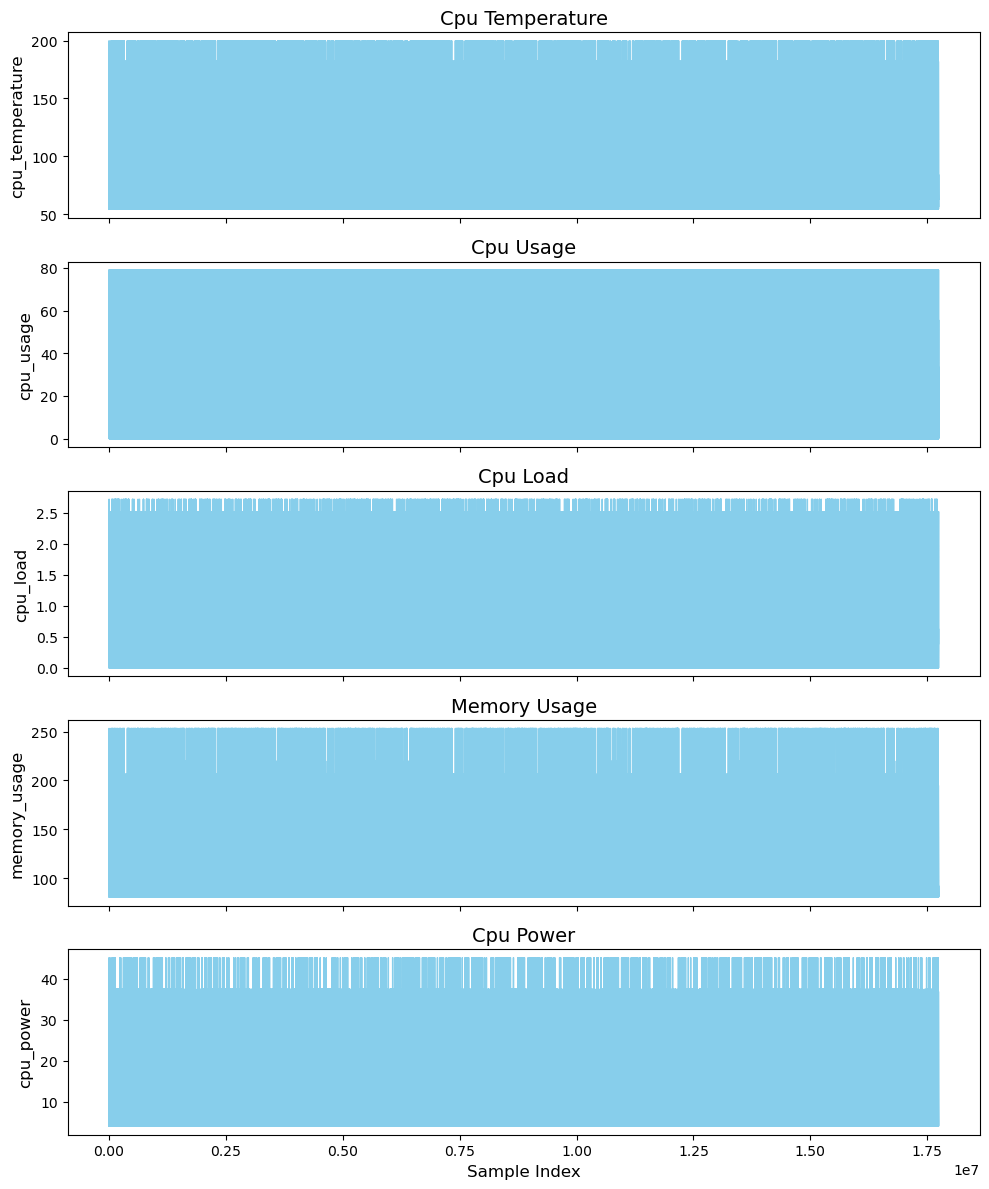

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df_downsampled = df2

# Sample column names in your DataFrame
columns = ['cpu_temperature', 'cpu_usage', 'cpu_load', 'memory_usage', 'cpu_power']

# Step 1: Convert each column to numeric, setting non-numeric values to NaN
for col in columns:
    df_downsampled[col] = pd.to_numeric(df_downsampled[col], errors='coerce')

# Step 2: Drop any rows with NaN values in any of the columns to ensure clean data for all columns
df_downsampled = df_downsampled.dropna(subset=columns)

# Step 3: Set up the figure with multiple subplots (one for each column)
fig, axes = plt.subplots(len(columns), 1, figsize=(10, 12), sharex=True)

# Step 4: Plot each column in its own subplot
for i, col in enumerate(columns):
    axes[i].plot(df_downsampled[col], color="skyblue", linewidth=1)
    axes[i].set_title(f"{col.replace('_', ' ').title()}", fontsize=14)
    axes[i].set_ylabel(col, fontsize=12)

# Set a common x-label for time or index
axes[-1].set_xlabel("Sample Index", fontsize=12)

# Improve layout and display the plot
plt.tight_layout()
plt.show()


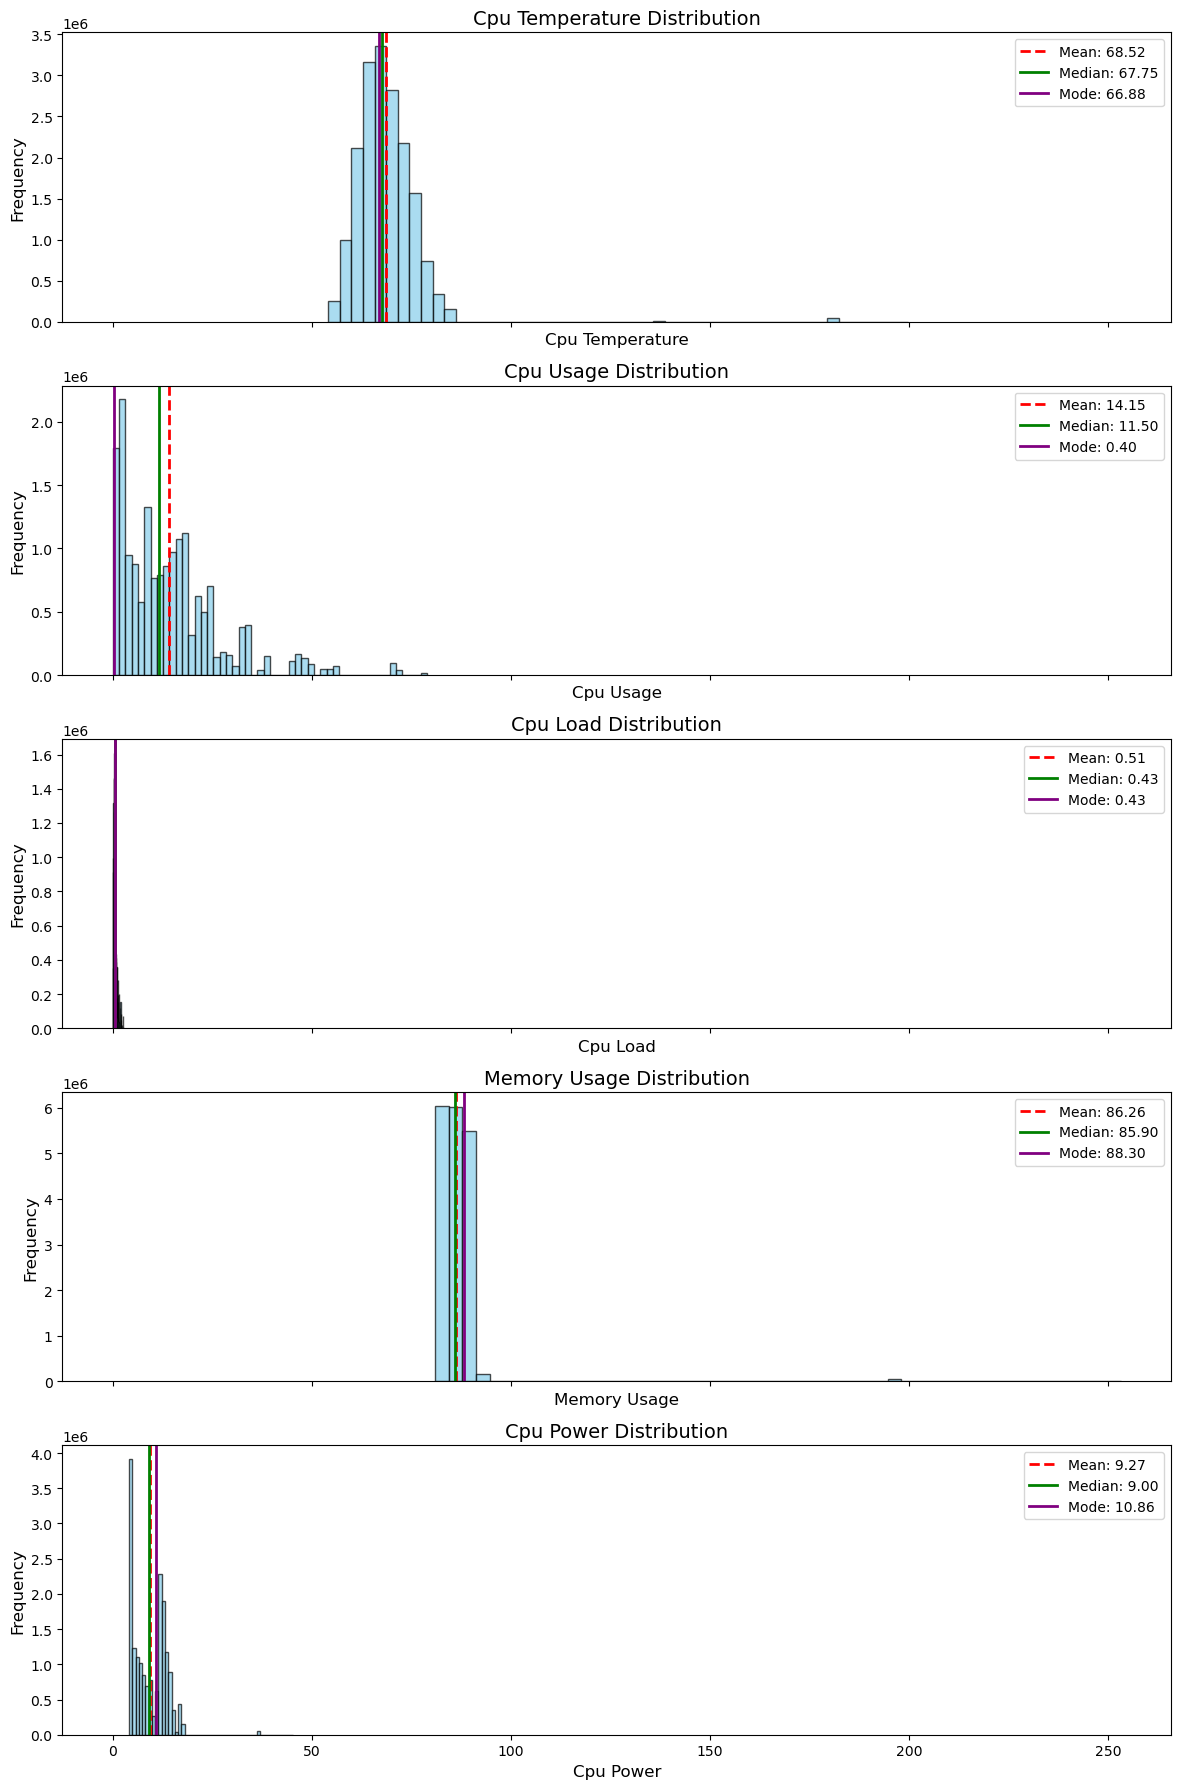

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Ensure each column is numeric, replacing non-numeric values with NaN and dropping them
columns = ['cpu_temperature', 'cpu_usage', 'cpu_load', 'memory_usage', 'cpu_power']
for col in columns:
    df_downsampled[col] = pd.to_numeric(df_downsampled[col], errors='coerce')
df_downsampled = df_downsampled.dropna(subset=columns)

# Set up the figure with multiple subplots
fig, axes = plt.subplots(len(columns), 1, figsize=(12, 18), sharex=True)

# Plot each column in its own subplot
for i, col in enumerate(columns):
    data = df_downsampled[col]

    # Calculate mean, median, and mode
    mean = data.mean()
    median = data.median()
    mode = data.mode().iloc[0]  # In case there are multiple modes, take the first

    # Plot the data distribution as a histogram
    axes[i].hist(data, bins=50, color="skyblue", edgecolor="black", alpha=0.7)
    
    # Add vertical lines for mean, median, and mode
    axes[i].axvline(mean, color='red', linestyle='--', linewidth=2, label=f"Mean: {mean:.2f}")
    axes[i].axvline(median, color='green', linestyle='-', linewidth=2, label=f"Median: {median:.2f}")
    axes[i].axvline(mode, color='purple', linestyle='-', linewidth=2, label=f"Mode: {mode:.2f}")
    
    # Set titles and labels
    axes[i].set_title(f"{col.replace('_', ' ').title()} Distribution", fontsize=14)
    axes[i].set_xlabel(col.replace('_', ' ').title(), fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].legend()

# Improve layout and display the plot
plt.tight_layout()
plt.show()


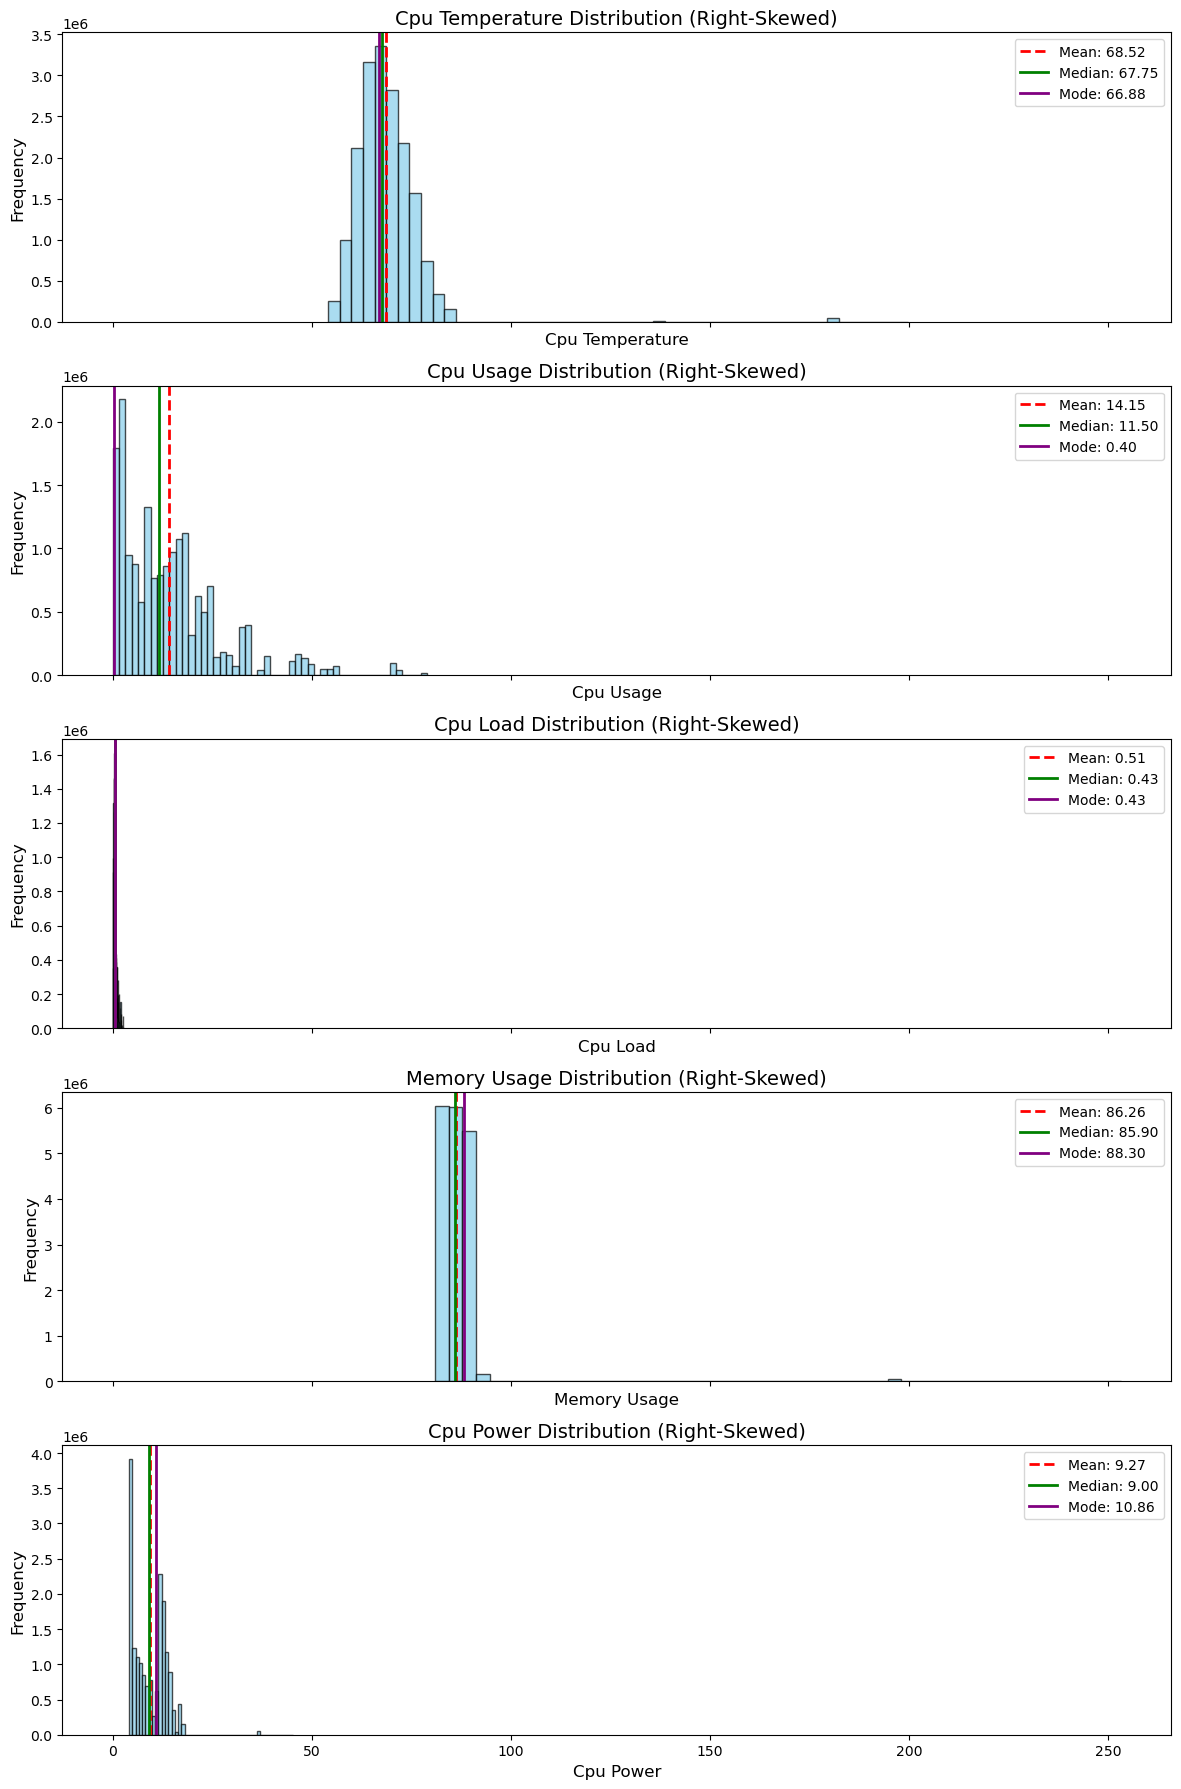

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Ensure each column is numeric and drop non-numeric rows
columns = ['cpu_temperature', 'cpu_usage', 'cpu_load', 'memory_usage', 'cpu_power']
for col in columns:
    df_downsampled[col] = pd.to_numeric(df_downsampled[col], errors='coerce')
df_downsampled = df_downsampled.dropna(subset=columns)

# Set up the figure with multiple subplots
fig, axes = plt.subplots(len(columns), 1, figsize=(12, 18), sharex=True)

# Plot each column in its own subplot with mean, median, mode, and skewness info
for i, col in enumerate(columns):
    data = df_downsampled[col]
    
    # Calculate mean, median, mode, and skewness
    mean = data.mean()
    median = data.median()
    mode = data.mode().iloc[0]  # Take the first mode if multiple exist
    skewness = data.skew()

    # Determine skewness label
    if skewness > 0:
        skew_label = "Right-Skewed"
    elif skewness < 0:
        skew_label = "Left-Skewed"
    else:
        skew_label = "Approximately Normal"

    # Plot histogram
    axes[i].hist(data, bins=50, color="skyblue", edgecolor="black", alpha=0.7)
    
    # Add vertical lines for mean, median, and mode
    axes[i].axvline(mean, color='red', linestyle='--', linewidth=2, label=f"Mean: {mean:.2f}")
    axes[i].axvline(median, color='green', linestyle='-', linewidth=2, label=f"Median: {median:.2f}")
    axes[i].axvline(mode, color='purple', linestyle='-', linewidth=2, label=f"Mode: {mode:.2f}")
    
    # Set title with skewness information
    axes[i].set_title(f"{col.replace('_', ' ').title()} Distribution ({skew_label})", fontsize=14)
    axes[i].set_xlabel(col.replace('_', ' ').title(), fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].legend(loc="upper right")

# Adjust layout for better fit
plt.tight_layout()
plt.show()


<Figure size 1400x1600 with 0 Axes>

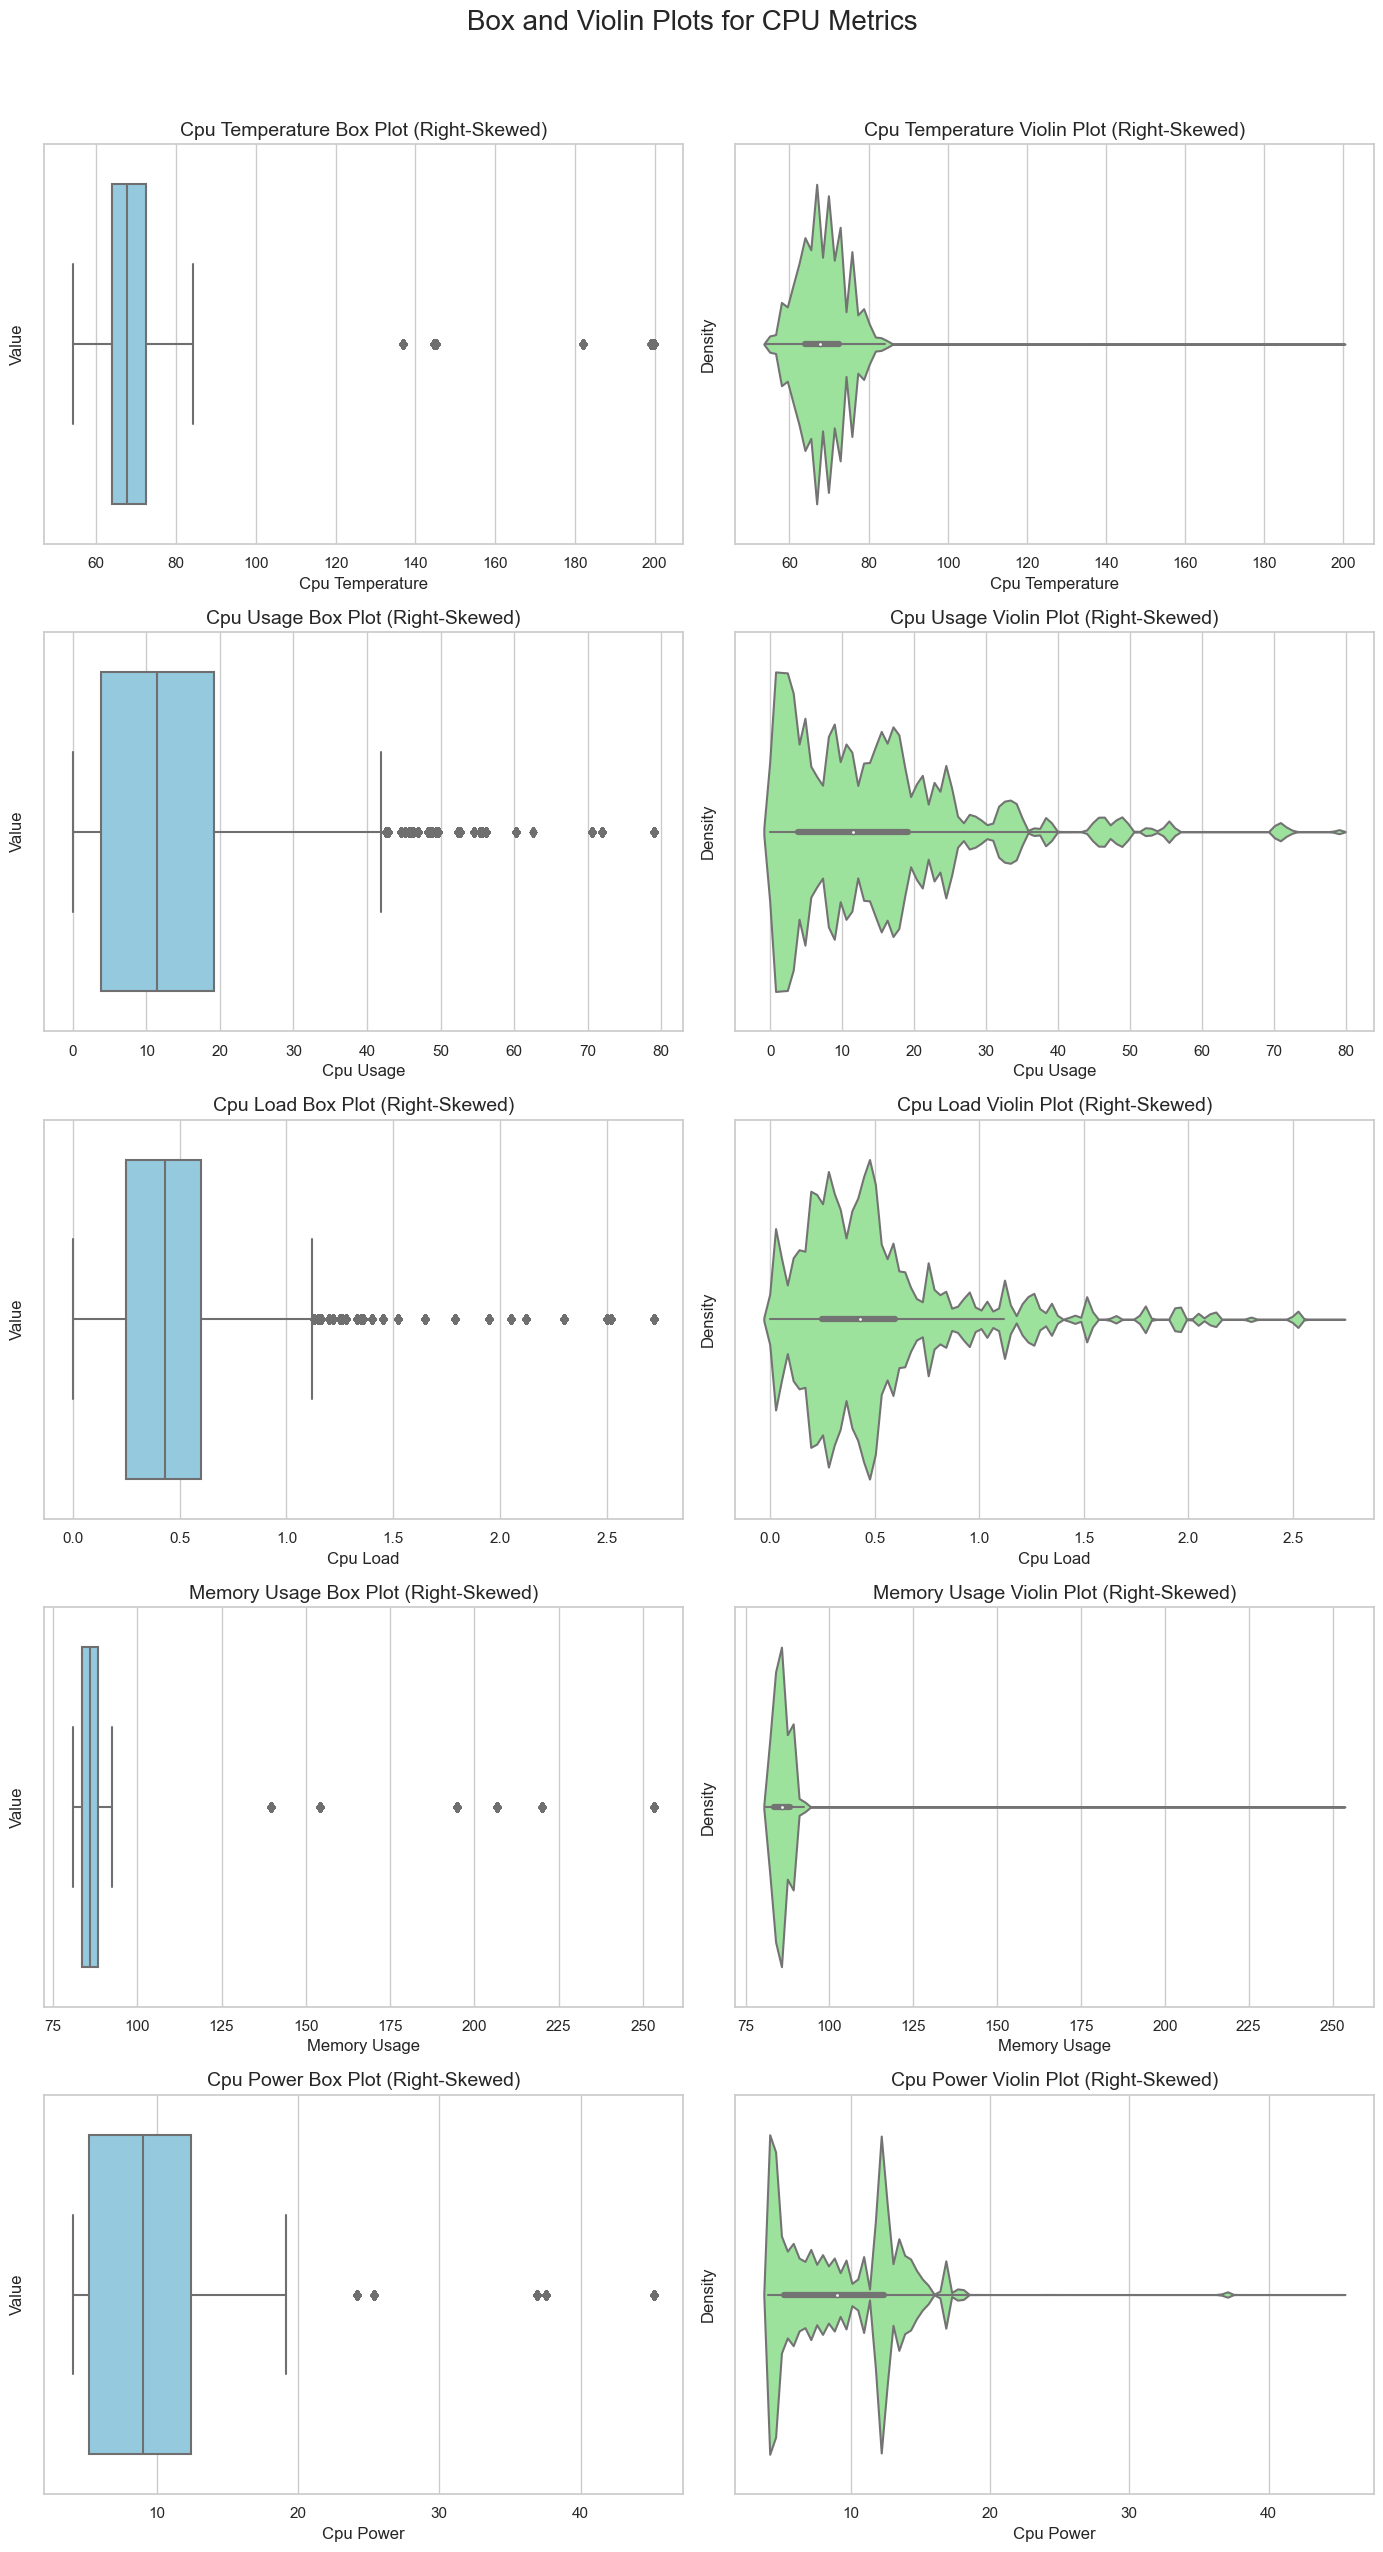

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert columns to numeric and drop non-numeric rows
columns = ['cpu_temperature', 'cpu_usage', 'cpu_load', 'memory_usage', 'cpu_power']
for col in columns:
    df_downsampled[col] = pd.to_numeric(df_downsampled[col], errors='coerce')
df_downsampled = df_downsampled.dropna(subset=columns)

# Set up the aesthetics for seaborn
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(14, 16))

# Create subplots for box and violin plots
fig, axes = plt.subplots(len(columns), 2, figsize=(14, len(columns) * 5))
fig.suptitle("Box and Violin Plots for CPU Metrics", fontsize=20, y=1.02)

for i, col in enumerate(columns):
    # Calculate skewness
    skewness = df_downsampled[col].skew()
    if skewness > 0:
        skew_label = "Right-Skewed"
    elif skewness < 0:
        skew_label = "Left-Skewed"
    else:
        skew_label = "Approximately Normal"

    # Box plot
    sns.boxplot(data=df_downsampled, x=col, ax=axes[i, 0], color="skyblue", fliersize=5)
    axes[i, 0].set_title(f"{col.replace('_', ' ').title()} Box Plot ({skew_label})", fontsize=14)
    axes[i, 0].set_xlabel(f"{col.replace('_', ' ').title()}", fontsize=12)
    axes[i, 0].set_ylabel("Value", fontsize=12)
    
    # Violin plot
    sns.violinplot(data=df_downsampled, x=col, ax=axes[i, 1], inner="box", color="lightgreen")
    axes[i, 1].set_title(f"{col.replace('_', ' ').title()} Violin Plot ({skew_label})", fontsize=14)
    axes[i, 1].set_xlabel(f"{col.replace('_', ' ').title()}", fontsize=12)
    axes[i, 1].set_ylabel("Density", fontsize=12)

# Adjust layout and spacing
plt.tight_layout()
plt.show()


Column: cpu_temperature
Number of anomalies: 4
Column: cpu_usage
Number of anomalies: 15
Column: cpu_load
Number of anomalies: 4
Column: memory_usage
Number of anomalies: 4
Column: cpu_power
Number of anomalies: 3
                       timestamp  cpu_temperature  cpu_usage  cpu_load  \
1028  2024-10-28 11:12:27.520974        80.625000  70.600000      1.12   
1059  2024-10-28 11:16:04.216708       137.013962  18.278379      0.46   
1129  2024-10-28 11:12:27.520974        80.625000  70.600000      1.12   
1172  2024-10-28 11:12:27.520974        80.625000  70.600000      1.12   
1241  2024-10-28 11:12:27.520974        80.625000  70.600000      1.12   
1246  2024-10-28 11:12:29.904079        75.875000  52.700000      1.35   
1273  2024-10-28 11:12:27.520974        80.625000  70.600000      1.12   
1348  2024-10-28 11:12:55.789797        80.500000  55.600000      2.52   
1379  2024-10-28 11:12:29.904079        75.875000  52.700000      1.35   
1388  2024-10-28 11:12:55.789797        80.500

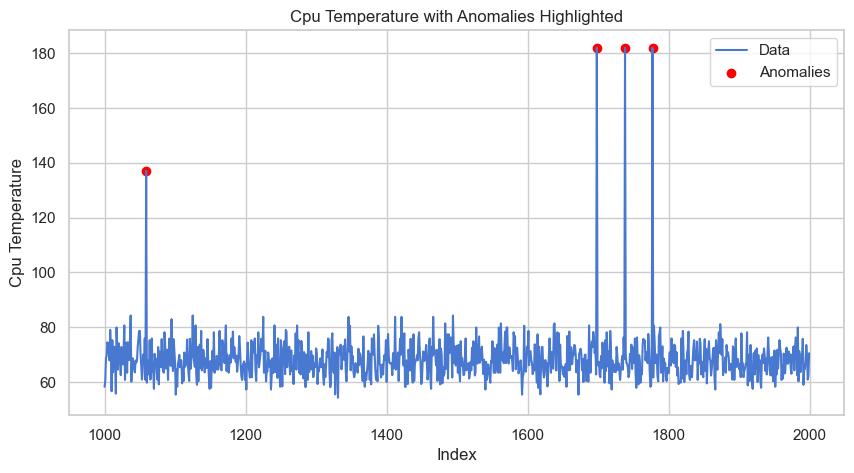

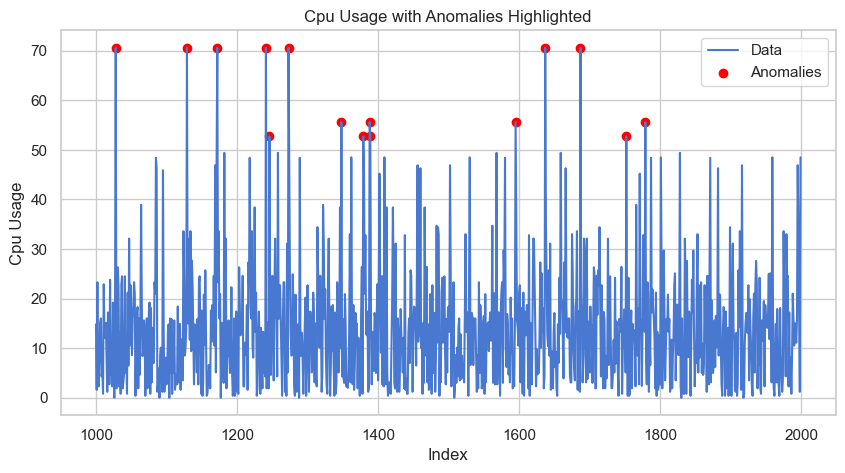

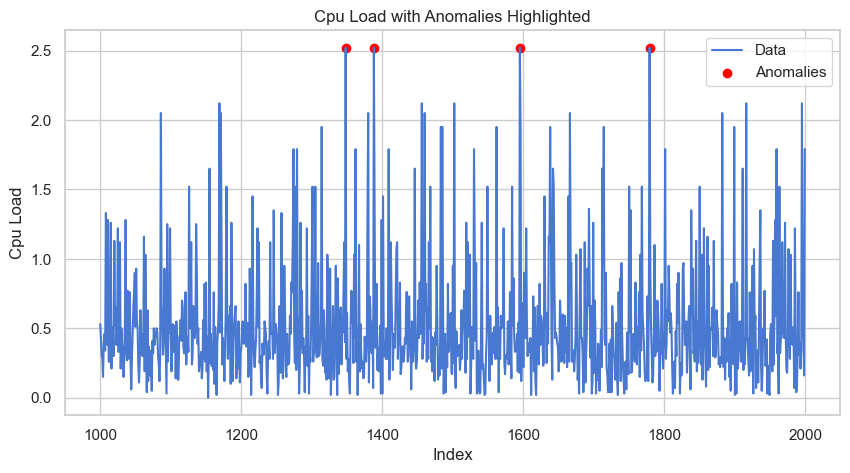

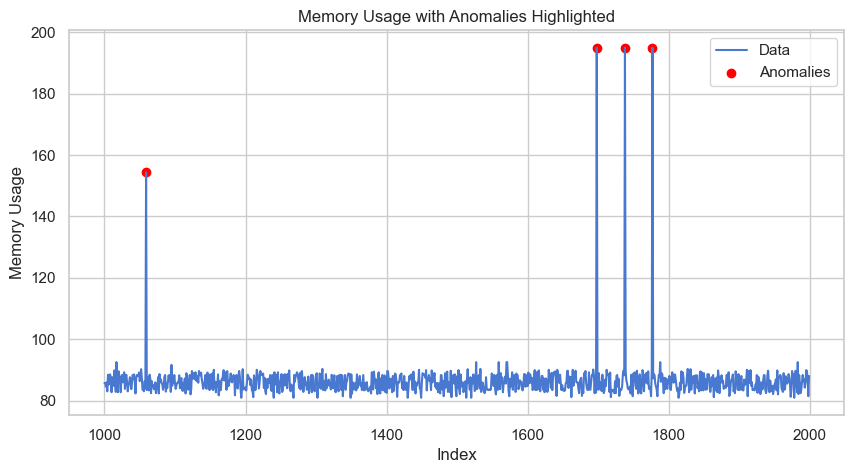

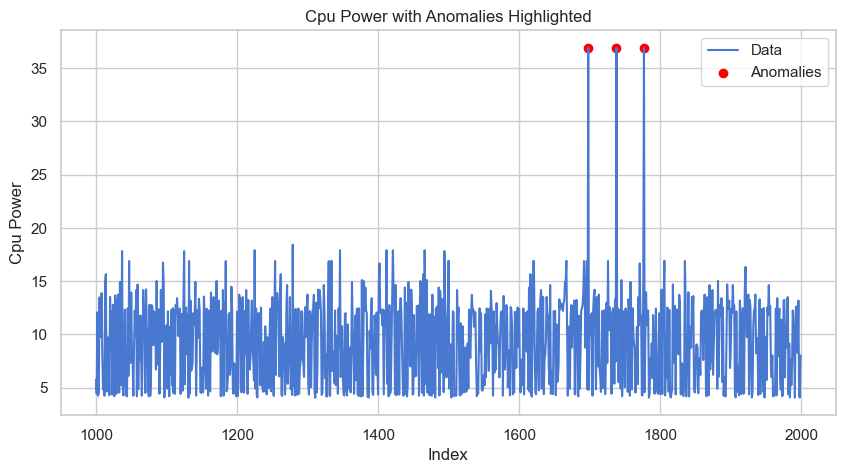

In [7]:
import numpy as np
import pandas as pd

# Sample columns of interest
columns = ['cpu_temperature', 'cpu_usage', 'cpu_load', 'memory_usage', 'cpu_power']
df_anomalies = df_downsampled.copy()[1000:2000]  # Assuming df_downsampled is your 1-million row dataset

# Define the threshold for outlier detection
k = 0  # You can adjust this value
thrs = [2, 3, 4, 2.7, 4]

# Identify anomalies in each column
for col in columns:
    mean = df_anomalies[col].mean()
    std_dev = df_anomalies[col].std()

    
    # Define outlier bounds
    lower_bound = mean - thrs[k] * std_dev
    upper_bound = mean + thrs[k] * std_dev
    k = k + 1 
    
    # Flag as an anomaly if outside bounds
    df_anomalies[f"{col}_anomaly"] =  (df_anomalies[col] > upper_bound)

# Display results: Show the count of anomalies in each column
for col in columns:
    print(f"Column: {col}")
    print(f"Number of anomalies: {df_anomalies[f'{col}_anomaly'].sum()}")

# Optionally, you can view the rows that contain anomalies
anomalies = df_anomalies[(df_anomalies[[f"{col}_anomaly" for col in columns]]).any(axis=1)]
print(anomalies)


import matplotlib.pyplot as plt

# Plot with anomalies highlighted for a single column
col = 'cpu_temperature'
plt.figure(figsize=(10, 5))
plt.plot(df_anomalies.index, df_anomalies[col], label='Data')
plt.scatter(df_anomalies.index[df_anomalies[f"{col}_anomaly"]], 
            df_anomalies.loc[df_anomalies[f"{col}_anomaly"], col], 
            color='red', label='Anomalies')
plt.xlabel("Index")
plt.ylabel(col.replace('_', ' ').title())
plt.legend()
plt.title(f"{col.replace('_', ' ').title()} with Anomalies Highlighted")
plt.show()


# Plot with anomalies highlighted for a single column
col = 'cpu_usage'
plt.figure(figsize=(10, 5))
plt.plot(df_anomalies.index, df_anomalies[col], label='Data')
plt.scatter(df_anomalies.index[df_anomalies[f"{col}_anomaly"]], 
            df_anomalies.loc[df_anomalies[f"{col}_anomaly"], col], 
            color='red', label='Anomalies')
plt.xlabel("Index")
plt.ylabel(col.replace('_', ' ').title())
plt.legend()
plt.title(f"{col.replace('_', ' ').title()} with Anomalies Highlighted")
plt.show()


# Plot with anomalies highlighted for a single column
col = 'cpu_load'
plt.figure(figsize=(10, 5))
plt.plot(df_anomalies.index, df_anomalies[col], label='Data')
plt.scatter(df_anomalies.index[df_anomalies[f"{col}_anomaly"]], 
            df_anomalies.loc[df_anomalies[f"{col}_anomaly"], col], 
            color='red', label='Anomalies')
plt.xlabel("Index")
plt.ylabel(col.replace('_', ' ').title())
plt.legend()
plt.title(f"{col.replace('_', ' ').title()} with Anomalies Highlighted")
plt.show()


# Plot with anomalies highlighted for a single column
col = 'memory_usage'
plt.figure(figsize=(10, 5))
plt.plot(df_anomalies.index, df_anomalies[col], label='Data')
plt.scatter(df_anomalies.index[df_anomalies[f"{col}_anomaly"]], 
            df_anomalies.loc[df_anomalies[f"{col}_anomaly"], col], 
            color='red', label='Anomalies')
plt.xlabel("Index")
plt.ylabel(col.replace('_', ' ').title())
plt.legend()
plt.title(f"{col.replace('_', ' ').title()} with Anomalies Highlighted")
plt.show()

# Plot with anomalies highlighted for a single column
col = 'cpu_power'
plt.figure(figsize=(10, 5))
plt.plot(df_anomalies.index, df_anomalies[col], label='Data')
plt.scatter(df_anomalies.index[df_anomalies[f"{col}_anomaly"]], 
            df_anomalies.loc[df_anomalies[f"{col}_anomaly"], col], 
            color='red', label='Anomalies')
plt.xlabel("Index")
plt.ylabel(col.replace('_', ' ').title())
plt.legend()
plt.title(f"{col.replace('_', ' ').title()} with Anomalies Highlighted")
plt.show()



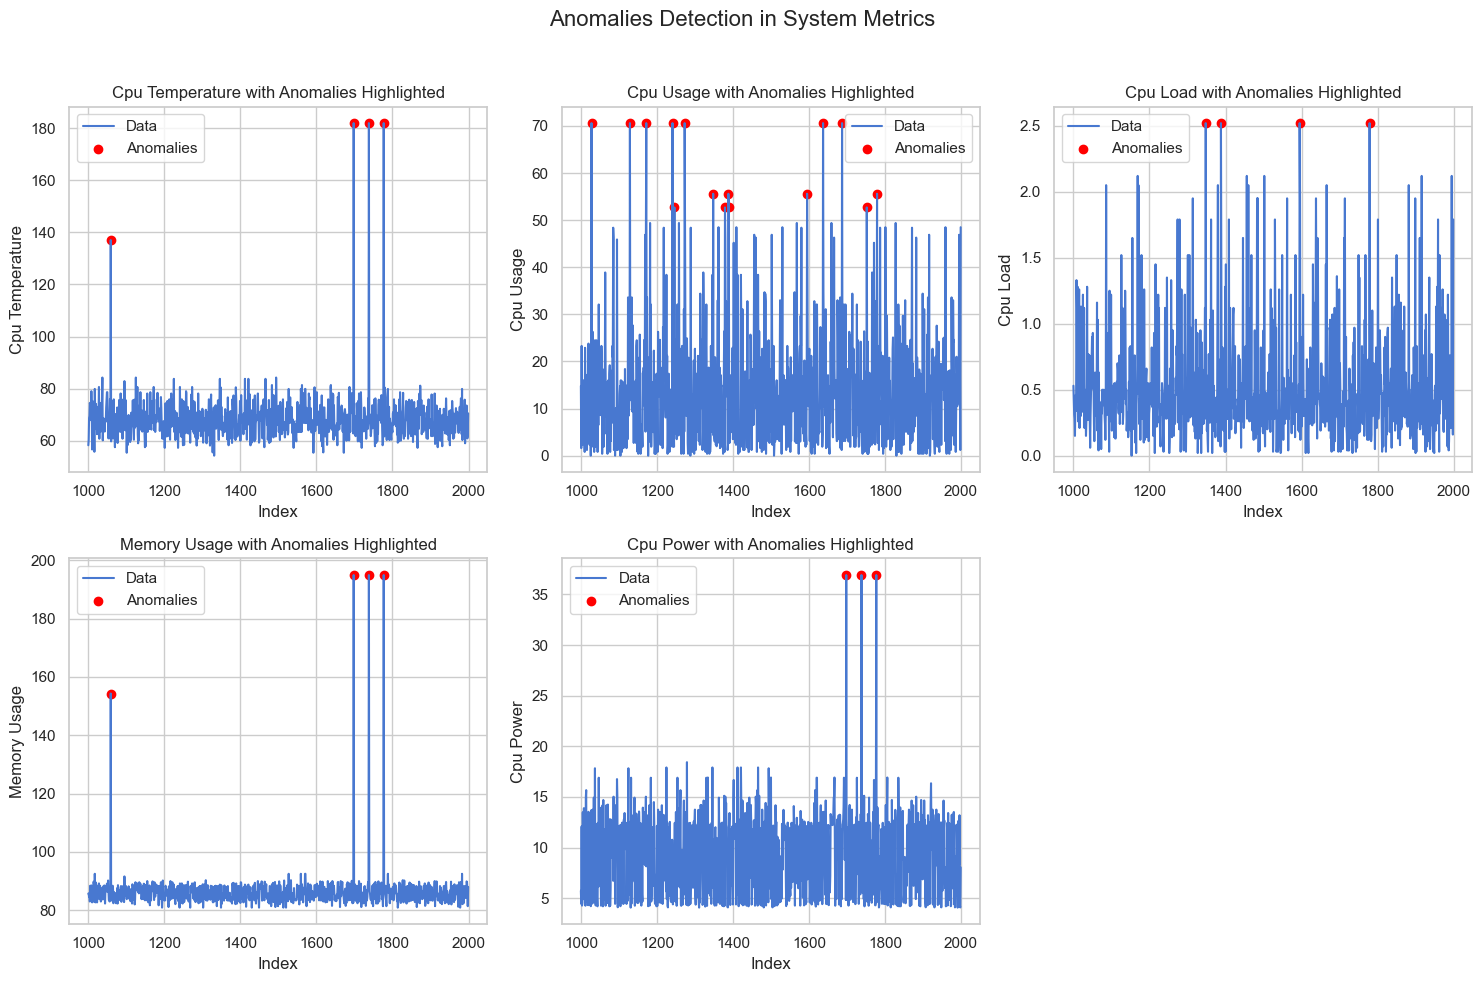

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Sample data frame with required columns
df_anomalies = df_downsampled.copy()[1000:2000]  # Use a subset of your data

# Columns and thresholds for outlier detection
columns = ['cpu_temperature', 'cpu_usage', 'cpu_load', 'memory_usage', 'cpu_power']
thrs = [2, 3, 4, 2.7, 4]  # Thresholds for each column

# Detect anomalies
for i, col in enumerate(columns):
    mean = df_anomalies[col].mean()
    std_dev = df_anomalies[col].std()
    
    # Define outlier bounds
    lower_bound = mean - thrs[i] * std_dev
    upper_bound = mean + thrs[i] * std_dev
    
    # Flag as an anomaly if outside bounds
    df_anomalies[f"{col}_anomaly"] = (df_anomalies[col] > upper_bound)

# Create a 2x3 subplot structure
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Anomalies Detection in System Metrics", fontsize=16)

# Plot each metric with anomalies
for i, col in enumerate(columns):
    row, col_position = divmod(i, 3)  # Calculate row and column positions
    ax = axs[row, col_position]
    
    # Plot the data
    ax.plot(df_anomalies.index, df_anomalies[col], label='Data')
    ax.scatter(df_anomalies.index[df_anomalies[f"{col}_anomaly"]],
               df_anomalies.loc[df_anomalies[f"{col}_anomaly"], col],
               color='red', label='Anomalies')
    ax.set_xlabel("Index")
    ax.set_ylabel(col.replace('_', ' ').title())
    ax.legend()
    ax.set_title(f"{col.replace('_', ' ').title()} with Anomalies Highlighted")

# Hide the empty subplot (last in the 2x3 grid)
axs[1, 2].axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for the main title
plt.show()


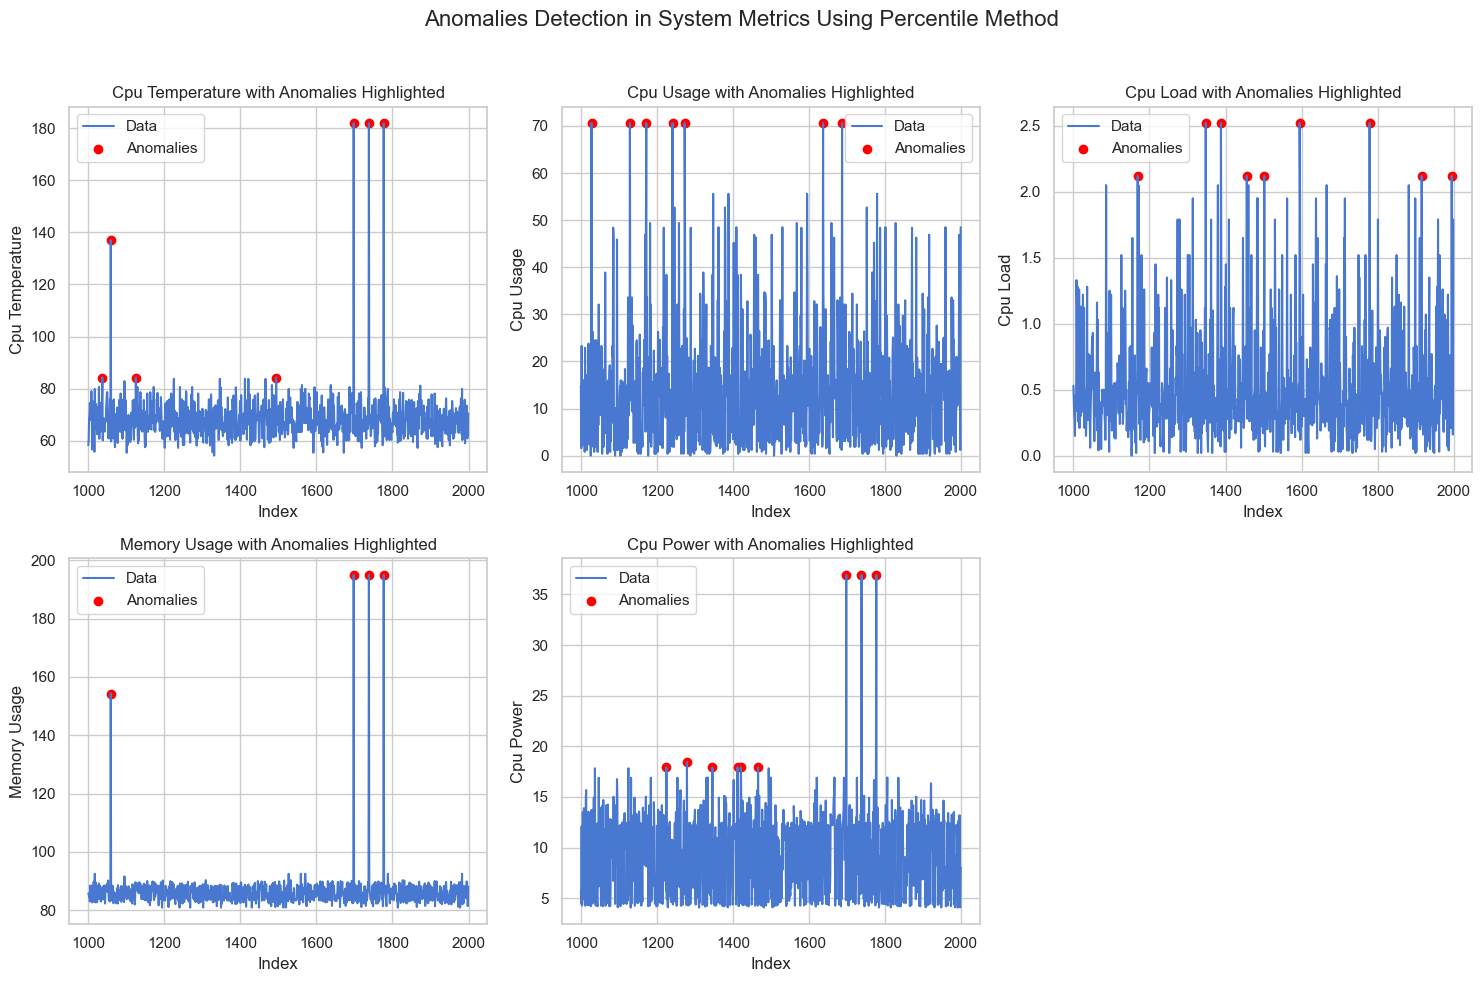

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Sample data frame with required columns
df_anomalies = df_downsampled.copy()[1000:2000]  # Use a subset of your data

# Columns and percentile thresholds
columns = ['cpu_temperature', 'cpu_usage', 'cpu_load', 'memory_usage', 'cpu_power']
lower_percentile = 1  # Lower percentile threshold
upper_percentile = 99  # Upper percentile threshold

# Detect anomalies using percentile method
for col in columns:
    lower_bound = np.percentile(df_anomalies[col], lower_percentile)
    upper_bound = np.percentile(df_anomalies[col], upper_percentile)
    
    # Flag as an anomaly if outside bounds
    df_anomalies[f"{col}_anomaly"] = df_anomalies[col] > upper_bound

# Create a 2x3 subplot structure
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Anomalies Detection in System Metrics Using Percentile Method", fontsize=16)

# Plot each metric with anomalies
for i, col in enumerate(columns):
    row, col_position = divmod(i, 3)  # Calculate row and column positions
    ax = axs[row, col_position]
    
    # Plot the data
    ax.plot(df_anomalies.index, df_anomalies[col], label='Data')
    ax.scatter(df_anomalies.index[df_anomalies[f"{col}_anomaly"]],
               df_anomalies.loc[df_anomalies[f"{col}_anomaly"], col],
               color='red', label='Anomalies')
    ax.set_xlabel("Index")
    ax.set_ylabel(col.replace('_', ' ').title())
    ax.legend()
    ax.set_title(f"{col.replace('_', ' ').title()} with Anomalies Highlighted")

# Hide the empty subplot (last in the 2x3 grid)
axs[1, 2].axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for the main title
plt.show()


In [10]:
import numpy as np
import pandas as pd

# Copy the dataframe to avoid modifying the original
df_anomalies = df_downsampled.copy()[1000:2000]

# Threshold for Z-score (3 is a common choice for anomalies)
z_threshold = 3

# Detect anomalies
for col in columns:
    # Calculate Z-scores
    mean = df_anomalies[col].mean()
    std_dev = df_anomalies[col].std()
    df_anomalies[f"{col}_z_anomaly"] = np.abs((df_anomalies[col] - mean) / std_dev) > z_threshold

# Count anomalies
for col in columns:
    print(f"Column: {col}")
    print(f"Number of anomalies: {df_anomalies[f'{col}_z_anomaly'].sum()}")


Column: cpu_temperature
Number of anomalies: 4
Column: cpu_usage
Number of anomalies: 15
Column: cpu_load
Number of anomalies: 23
Column: memory_usage
Number of anomalies: 4
Column: cpu_power
Number of anomalies: 3


In [11]:
# Detect anomalies using IQR method
for col in columns:
    # Calculate Q1, Q3, and IQR
    Q1 = df_anomalies[col].quantile(0.25)
    Q3 = df_anomalies[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Flag anomalies
    df_anomalies[f"{col}_iqr_anomaly"] = (df_anomalies[col] < lower_bound) | (df_anomalies[col] > upper_bound)

# Count anomalies
for col in columns:
    print(f"Column: {col}")
    print(f"Number of anomalies: {df_anomalies[f'{col}_iqr_anomaly'].sum()}")


Column: cpu_temperature
Number of anomalies: 12
Column: cpu_usage
Number of anomalies: 47
Column: cpu_load
Number of anomalies: 86
Column: memory_usage
Number of anomalies: 4
Column: cpu_power
Number of anomalies: 3


In [12]:
# Define moving average window and threshold for anomaly detection
window_size = 20  # Adjust based on your data
std_threshold = 3  # Common choice is 3

# Apply moving average and detect anomalies
for col in columns:
    rolling_mean = df_anomalies[col].rolling(window=window_size).mean()
    rolling_std = df_anomalies[col].rolling(window=window_size).std()
    
    # Flag as an anomaly if outside the control limits
    df_anomalies[f"{col}_ma_anomaly"] = (
        (df_anomalies[col] < rolling_mean - std_threshold * rolling_std) |
        (df_anomalies[col] > rolling_mean + std_threshold * rolling_std)
    )

# Count anomalies
for col in columns:
    print(f"Column: {col}")
    print(f"Number of anomalies: {df_anomalies[f'{col}_ma_anomaly'].sum()}")


Column: cpu_temperature
Number of anomalies: 4
Column: cpu_usage
Number of anomalies: 13
Column: cpu_load
Number of anomalies: 16
Column: memory_usage
Number of anomalies: 4
Column: cpu_power
Number of anomalies: 3


In [13]:
from sklearn.ensemble import IsolationForest

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.01, random_state=42)  # contamination = proportion of expected anomalies

# Fit and predict anomalies
iso_forest.fit(df_anomalies[columns])
df_anomalies['iso_anomaly'] = iso_forest.predict(df_anomalies[columns])

# IsolationForest labels anomalies as -1, convert for easier analysis
df_anomalies['iso_anomaly'] = df_anomalies['iso_anomaly'].map({1: False, -1: True})

# Count anomalies
for col in columns:
    print(f"Column: {col}")
    print(f"Number of anomalies: {df_anomalies['iso_anomaly'].sum()}")


Column: cpu_temperature
Number of anomalies: 9
Column: cpu_usage
Number of anomalies: 9
Column: cpu_load
Number of anomalies: 9
Column: memory_usage
Number of anomalies: 9
Column: cpu_power
Number of anomalies: 9


C:\Users\anany\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest


In [15]:
# Sample data subset, assuming df_downsampled is the original 1-million row dataset
df_anomalies = df_downsampled.copy()[1000:2000]  # Modify as needed
columns = ['cpu_temperature', 'cpu_usage', 'cpu_load', 'memory_usage', 'cpu_power']


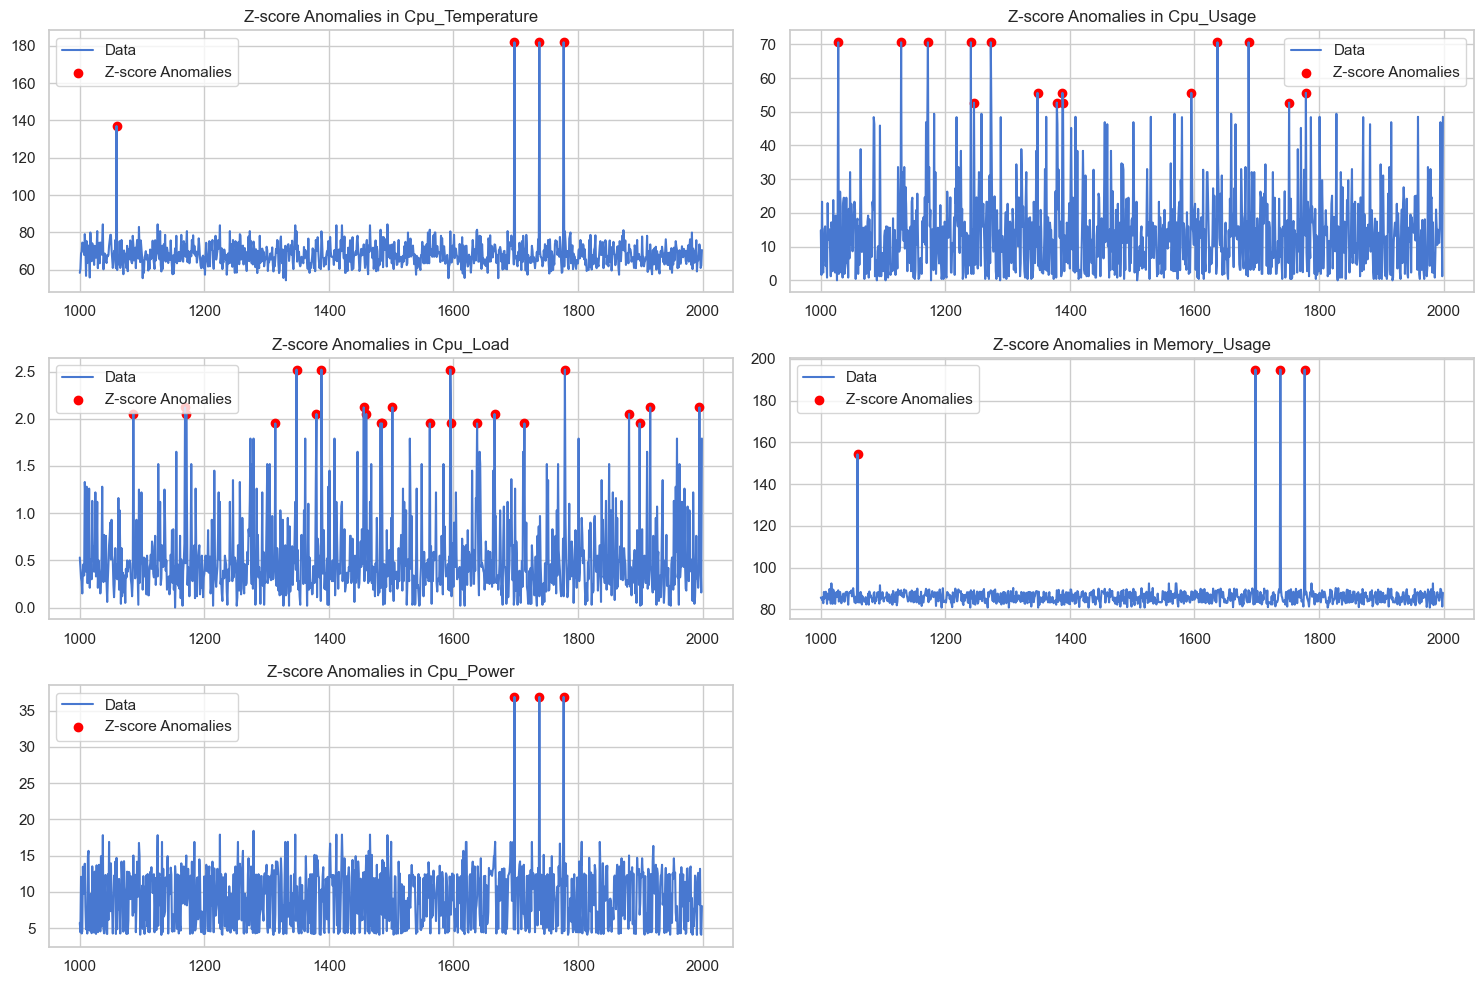

In [23]:
z_threshold = 3  # Threshold for Z-score anomalies

# Specify only the first 5 columns for graphing
columns_to_plot = columns[:5]

fig, axs = plt.subplots(3, 2, figsize=(15, 10))  # Create a 3x2 grid
axs = axs.flatten()

for i, col in enumerate(columns_to_plot):
    mean = df_anomalies[col].mean()
    std_dev = df_anomalies[col].std()
    anomalies = np.abs((df_anomalies[col] - mean) / std_dev) > z_threshold

    ax = axs[i]  # Access each subplot sequentially
    ax.plot(df_anomalies.index, df_anomalies[col], label='Data')
    ax.scatter(df_anomalies.index[anomalies], df_anomalies.loc[anomalies, col], color='red', label='Z-score Anomalies')
    ax.set_title(f"Z-score Anomalies in {col.title()}")
    ax.legend()

# Hide any unused subplot
for j in range(len(columns_to_plot), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


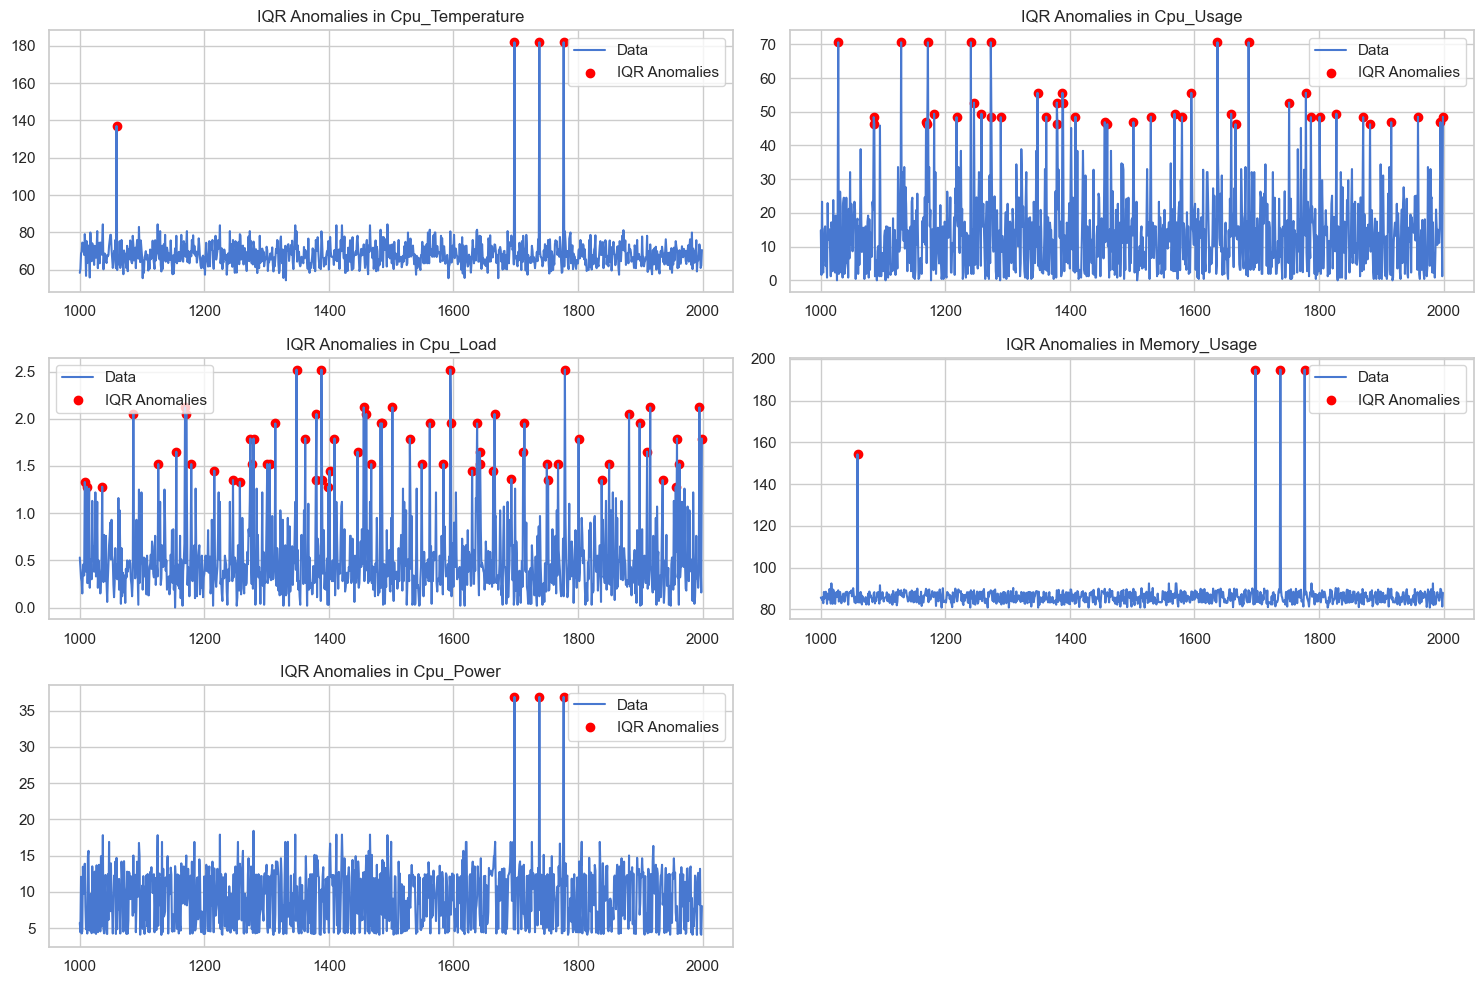

In [24]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

# Specify only the first 5 columns for graphing
columns_to_plot = columns[:5]

axs = axs.flatten()

for i, col in enumerate(columns_to_plot):
    # Calculate IQR-based anomalies
    Q1 = df_anomalies[col].quantile(0.25)
    Q3 = df_anomalies[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.9 * IQR
    anomalies = df_anomalies[col] > upper_bound

    ax = axs[i]  # Access each subplot sequentially
    ax.plot(df_anomalies.index, df_anomalies[col], label='Data')
    ax.scatter(df_anomalies.index[anomalies], df_anomalies.loc[anomalies, col], color='red', label='IQR Anomalies')
    ax.set_title(f"IQR Anomalies in {col.title()}")
    ax.legend()

# Hide any unused subplot
for j in range(len(columns_to_plot), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


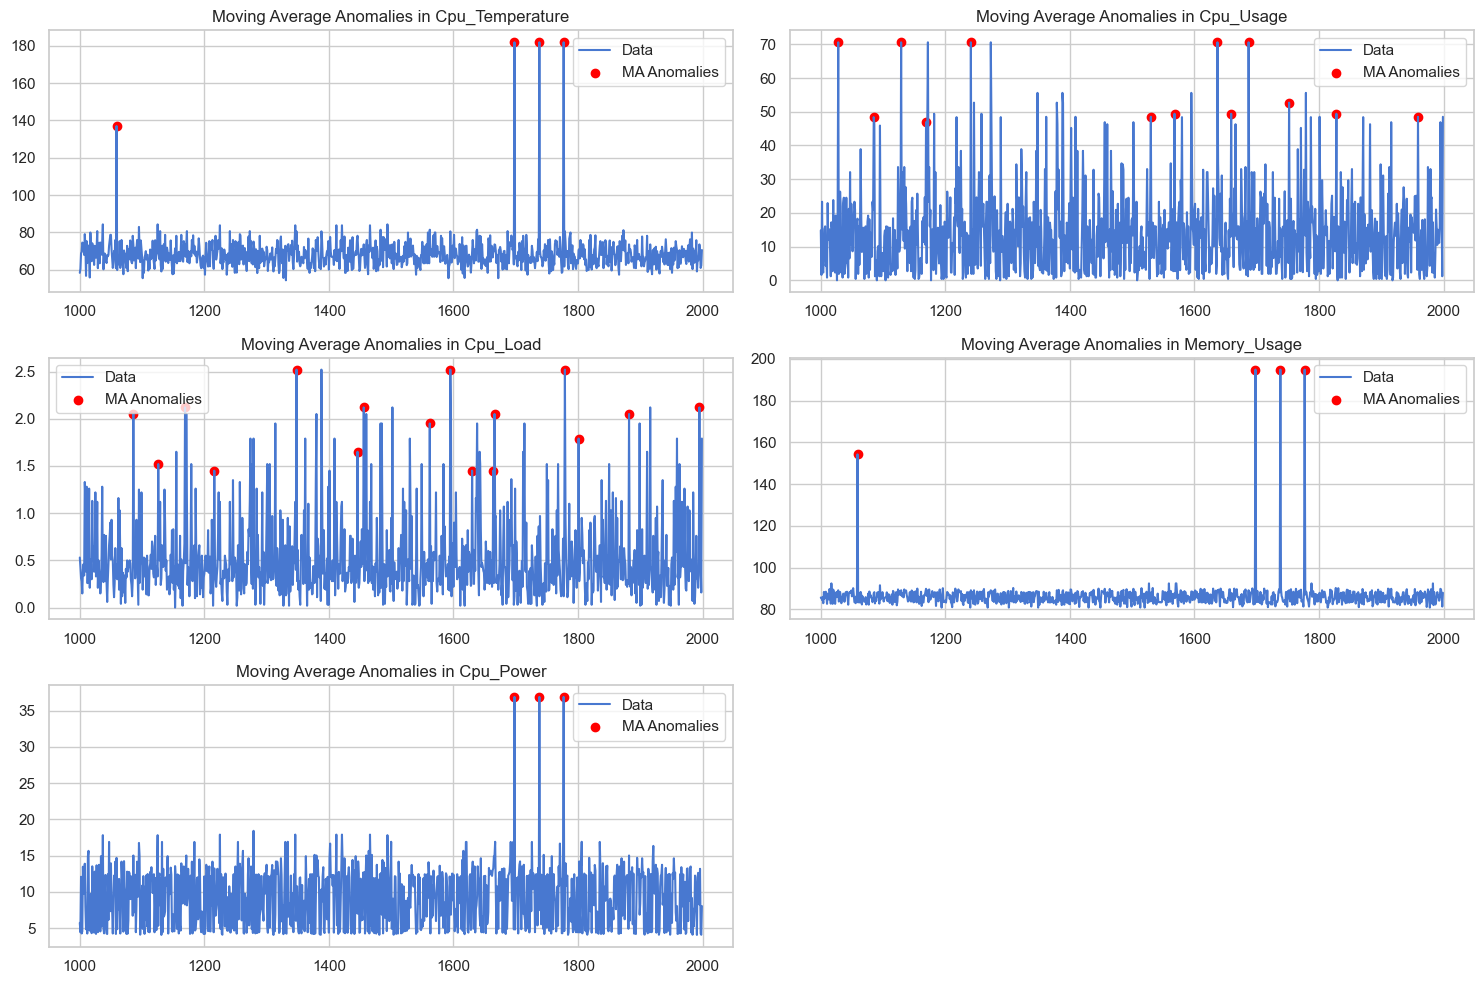

In [25]:
window_size = 20
std_threshold = 3
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

# Specify only the first 5 columns for graphing
columns_to_plot = columns[:5]

# Flatten the axs array for easier access
axs = axs.flatten()

for i, col in enumerate(columns_to_plot):
    rolling_mean = df_anomalies[col].rolling(window=window_size).mean()
    rolling_std = df_anomalies[col].rolling(window=window_size).std()
    anomalies = (df_anomalies[col] < rolling_mean - std_threshold * rolling_std) | \
                (df_anomalies[col] > rolling_mean + std_threshold * rolling_std)

    ax = axs[i]  # Access each subplot sequentially
    ax.plot(df_anomalies.index, df_anomalies[col], label='Data')
    ax.scatter(df_anomalies.index[anomalies], df_anomalies.loc[anomalies, col], color='red', label='MA Anomalies')
    ax.set_title(f"Moving Average Anomalies in {col.title()}")
    ax.legend()

# Hide any unused subplot
for j in range(len(columns_to_plot), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


C:\Users\anany\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


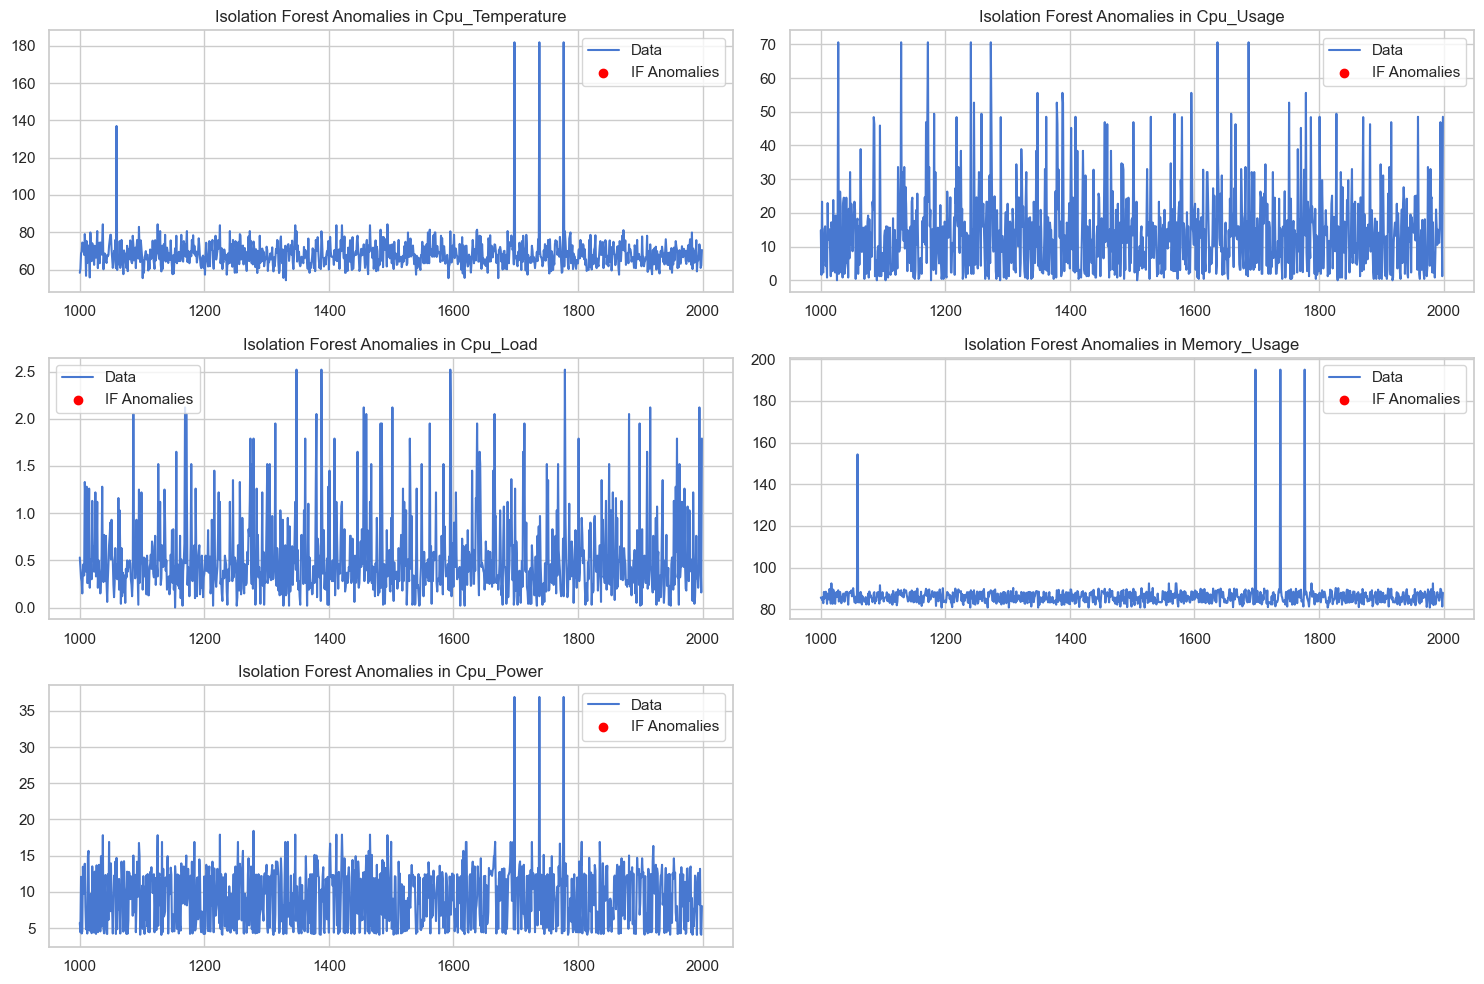

In [22]:
iso_forest = IsolationForest(contamination=0.01, random_state=42)
iso_forest.fit(df_anomalies[columns])

# Convert the predictions to a pandas Series and handle missing values
df_anomalies['iso_anomaly'] = pd.Series(iso_forest.predict(df_anomalies[columns])).map({1: False, -1: True})

# Replace NaN values in 'iso_anomaly' with False to avoid masking issues
df_anomalies['iso_anomaly'] = df_anomalies['iso_anomaly'].fillna(False)

# Specify only the first 5 columns for graphing
columns_to_plot = columns[:5]

fig, axs = plt.subplots(3, 2, figsize=(15, 10))  # Still create a 3x2 grid for uniform spacing
axs = axs.flatten()

for i, col in enumerate(columns_to_plot):
    # Select only rows where 'iso_anomaly' is True
    anomalies = df_anomalies[df_anomalies['iso_anomaly']]

    ax = axs[i]  # Access each subplot sequentially
    ax.plot(df_anomalies.index, df_anomalies[col], label='Data')
    # Plot anomalies using the filtered DataFrame
    ax.scatter(anomalies.index, anomalies[col], color='red', label='IF Anomalies')
    ax.set_title(f"Isolation Forest Anomalies in {col.title()}")
    ax.legend()

# Hide any unused subplot
for j in range(len(columns_to_plot), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()
